# dust star tests

Various tests of effects of just having a predefined clump of hot (grey) "dust" in a spherical clump in the central parts of the grid.

With these settings I get a maximum luminosity of some 430Lsol.

- Rstar = 100Rsol
- Teff = 2700K
- kappaabs = 1 for all wavelengths shorter than where the peak of BB(frequency) with T=2700K, then kappaabs proptop lambda^-1


In [3]:
import create_r3d_functions as c3d
import os

gridsize = 4
c3d.create_grid(gridsize,8,[
        gridsize*0.45,gridsize*0.4,gridsize*0.35,gridsize*0.3
    ]
)

duststarmass = [
    1e-15,1e-10,1e-8,
    1e-6,3e-6,5e-6,7e-6,9e-6,2e-5,4e-5,6e-5,8e-5,
    1e-4,1e-3,1e-2,1e-1,1,1e1
]

with open('../r3dsims/runmany_duststars.sh','w') as f:

    for mass in duststarmass:
        c3d.create_duststar(Mstar = mass)
        os.rename('../dust_density_star.inp', f'../dust_density_star_{mass:.0e}.inp')

        f.write(f'mv dust_density_star_{mass:.0e}.inp dust_density.inp\n')
        f.write(f'radmc3d sed\n')
        f.write(f'mv spectrum.out spectrum_duststar_{mass:.0e}.out\n')
        f.write(f'mv dust_density.inp dust_density_star_{mass:.0e}.inp\n')
os.system('chmod +x ../r3dsims/runmany_duststars.sh')


Creating amr_grid with octree refinement.
Length of total side of whole grid: 4 AU
Number of base cells along one side of the grid: 8
Distances to refinement limits from centrum: [1.8, 1.6, 1.4, 1.2] AU
Number refinements: 4
Size of base cell: 0.5 AU
Child cell size 1: 0.25 AU
Child cell size 2: 0.125 AU
Child cell size 3: 0.0625 AU
Child cell size 4: 0.03125 AU
Writing amr_grid.inp
Finished amr_grid.inp
Writing grid_distances.csv and grid_cellsizes.csv
(Not necessary for Radmc3d, but useful for pre/portprocessing of your model. They have the same order as dust_densities.inp)
Finished grid_distances.csv
Finished grid_cellsizes.csv
Writing grid_info.txt
Finished grid_info.txt
Create grid: done.

Radius of star: 0.46 AU (100.0 Rsun)
Average star density: 1.4e-21 g/cm3
Cells inside star: 13776
Writing dust_density_star.inp
Finished dust_density_star.inp
Writing dust_temperature_star.dat
Finished dust_temperature_star.dat
Creating wavelength grid
Logarithmic wavelength grid was chosen
Writ

0

/home/joachim/exwings/exwings-codes/plot_r3d_functions.py:170: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


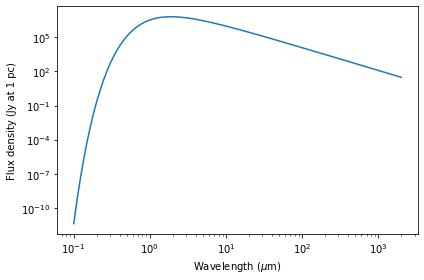

In [10]:
import plot_r3d_functions as p3d
p3d.plot_sed(f'../r3dresults/duststar_tests_2/spectrum_duststar_{duststarmass[-1]:.0e}.out')


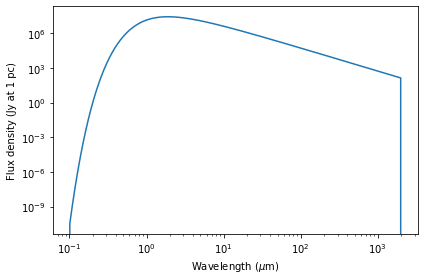

In [11]:
import plot_r3d_functions as p3d
p3d.plot_sed('../r3dresults/duststar_tests_2/spectrum_blackbodystar.out')

mass: 1e-15, lum: 5.533772632022246e-06
mass: 1e-10, lum: 0.5530147787755728
mass: 1e-08, lum: 51.72399883440619
mass: 1e-06, lum: 472.8374386624547
mass: 3e-06, lum: 476.7836154334943
mass: 5e-06, lum: 477.04164616177746
mass: 7e-06, lum: 477.0954092058247
mass: 9e-06, lum: 477.1133144238951
mass: 2e-05, lum: 477.12946081828426
mass: 4e-05, lum: 477.13109525770716
mass: 6e-05, lum: 477.1312693419316
mass: 8e-05, lum: 477.1313125681424
mass: 1e-04, lum: 477.131328108363
mass: 1e-03, lum: 477.1313444362528
mass: 1e-02, lum: 477.13134444683004
mass: 1e-01, lum: 477.13134444683004
mass: 1e+00, lum: 477.13134444683004
mass: 1e+01, lum: 477.13134444683004
Classic (bol) luminotiy: 4pi R^2 sigma T^4 = 478.5187556789513


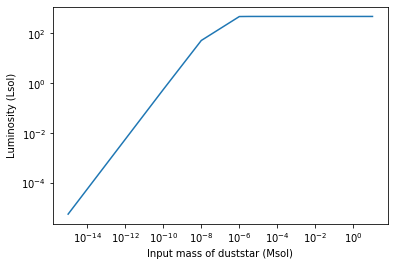

In [13]:
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
import numpy as np

#l1 = a3d.compute_luminosity(
#    path='../r3dsims/spectrum_blackbodystar.out',distance=1
#)

duststarmass = [
    1e-15,1e-10,1e-8,
    1e-6,3e-6,5e-6,7e-6,9e-6,2e-5,4e-5,6e-5,8e-5,
    1e-4,1e-3,1e-2,1e-1,1,1e1
]

Lsol = 3.828e26 # Watt
AUcm = 1.49598e11 # m
Msol = 1.989e30 # kg
Rsol = 6.955e8 # m
sigma = 5.670374e-8 # Wm-2K-4

lumduststar = []

for mass in duststarmass:
    l = a3d.compute_luminosity(
        path=f'../r3dresults/duststar_tests_2/spectrum_duststar_{mass:.0e}.out',distance=1
    )
    print(f'mass: {mass:.0e}, lum: {l/Lsol}')

    lumduststar.append(l/Lsol)

# L = 4pi R2 sigma T4, sigma=SB-konstant, 5.670374e-8 Wm-2K-4

lum_sb = 4*np.pi*(100*Rsol)**2*sigma*2700**4

print(f'Classic (bol) luminotiy: 4pi R^2 sigma T^4 = {lum_sb/Lsol}')

plt.plot(duststarmass,lumduststar)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Luminosity (Lsol)');
plt.xlabel('Input mass of duststar (Msol)');
